In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
train_dir = r"C:\projects ml\dogs and cats"

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_dataset = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",  
    seed=42
)

Found 13996 files belonging to 2 classes.


In [ ]:
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(process)

validation_size = int(0.2 * len(train_dataset))
validation_dataset = train_dataset.take(validation_size)
train_dataset = train_dataset.skip(validation_size)


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(150, 150, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 236ms/step - accuracy: 0.8802 - loss: 0.3724 - val_accuracy: 0.8948 - val_loss: 0.2955
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.8916 - loss: 0.3119 - val_accuracy: 0.9062 - val_loss: 0.2969
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.9001 - loss: 0.2760 - val_accuracy: 0.9062 - val_loss: 0.2865
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 246ms/step - accuracy: 0.9097 - loss: 0.2515 - val_accuracy: 0.9077 - val_loss: 0.2680
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 83s 235ms/step - accuracy: 0.9207 - loss: 0.2138 - val_accuracy: 0.9091 - val_loss: 0.2853
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 79s 225ms/step - accuracy: 0.9355 - loss: 0.1778 - val_accuracy: 0.9041 - val_loss: 0.4327
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 80s 226ms/step - accuracy: 0.9447 - loss: 0.1486 - val_accuracy: 0.9037 - val_loss: 0.4662
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 79s 225ms/step - accuracy: 0.9562 - loss: 0

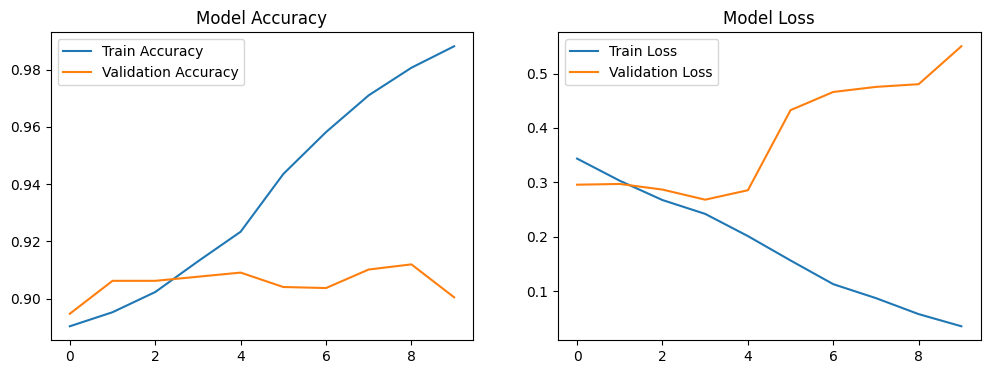

In [ ]:
EPOCHS = 10
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [12]:
model.save("cats_vs_dogs_model.h5")

In [15]:
def predict_image(image_path):
    image = keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    image_array = keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0) / 255.0  # Normalize
    prediction = model.predict(image_array)[0][0]
    return "Dog" if prediction > 0.5 else "Cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


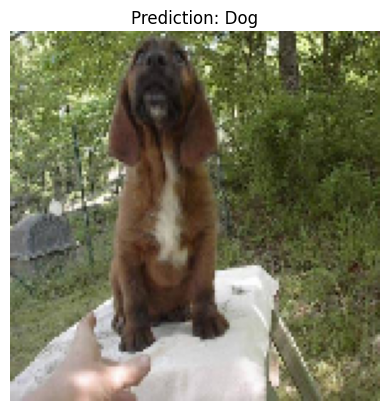

Prediction: Dog


In [ ]:
model = keras.models.load_model("cats_vs_dogs_model.h5")

image_path = "C:\\projects ml\\dogs and cats\\traindogs\\dog.5.jpg "                    
prediction = predict_image(image_path)
print(f"Prediction: {prediction}")

def predict_image(image_path):
    image = keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    image_array = keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0) / 255.0  
    prediction = model.predict(image_array)[0][0]
    
    plt.imshow(image)
    plt.axis("off")
    plt.title("Prediction: " + ("Dog" if prediction > 0.5 else "Cat"))
    plt.show()
    
    return "Dog" if prediction > 0.5 else "Cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


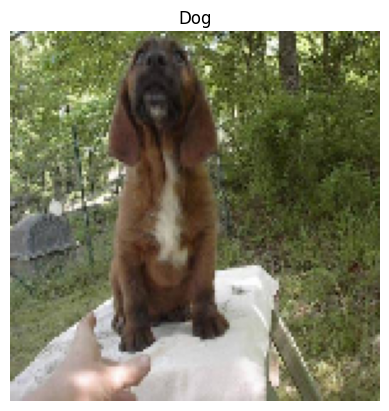

Prediction: Dog


In [ ]:
def predict_image():
    image_path = input("Enter the path of the image: ")
    if not os.path.exists(image_path):
        print("Error: File not found!")
        return
    
    image = keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    image_array = keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0) / 255.0  # Normalize
    prediction = model.predict(image_array)[0][0]
    
    plt.imshow(image)
    plt.title("Dog" if prediction > 0.5 else "Cat")
    plt.axis("off")
    plt.show()
    
    print("Prediction:", "Dog" if prediction > 0.5 else "Cat")

predict_image()
